[Folium+API](https://wooiljeong.github.io/python/folium_vworld_dataapi/)  
[QGIS+python](https://foss4g.tistory.com/1476)  
[구역 검색](https://www.vworld.kr/dev/v4dv_2ddataguide2_s001.do)  
[파라미터 사전](https://www.vworld.kr/dev/v4dv_2ddataguide2_s002.do?svcIde=uq125)  

In [37]:
# Download packages
# !pip install requests
#!pip install jsonlines
# ! pip install folium

In [2]:
import requests
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# API 인증키
vworld_key = ""
# 엔드포인트 지정
end = "https://api.vworld.kr/req/data"

In [4]:
# 제한구역 데이터 가져오기
def get_restricted(endpoint, key):

    ## 요청 파라미터
    service = "data" # 요청 서비스명 data(기본값)
    version = "2.0" # 요청 서비스 버전 2.0(기본값)
    request = "GetFeature" # 요청 서비스 오퍼레이션 | GetFeature, GetFeatureType
    format= "json" # 응답결과 포맷 | json(기본값), xml
    size = "60" # 한 페이지에 출력될 응답결과 건수 | default(10), min(1), max(1000)
    page = "1" # 응답결과 페이지 번호 | 기본값 : 1
    data = "LT_C_AISRESC" # 조회할 데이터 | LT_C_AISRESC
    columns = "restricted,res_lbl_1,res_lbl_2,res_lbl_3,ag_geom"
    geomfilter="BOX(127.0, 35.0, 131.0, 37.0)" # 지오메트리 필터 | 경북포항 경계
    '''지오메트리 필터 포맷
    - POINT(x y)
    - LINESTRING(x1 y1,x2 y2 [,xn yn])
    - POLYGON((x1 y1,x2 y2[,xn yn]))
    - MULTIPOLYGON(((x1 y1,x2 y2[,xn yn]))[,((x1 y1,x2 y2 [,xn yn]))])
    - BOX(minx,miny,maxx,maxy)
    '''
    geometry = "true" # 지오메트리 반환 여부 | true(기본값), false
    attribute = "true" # 속성 반환 여부 | true(기본값), false
    buffer = "10" # geomFilter파라미터에 입력한 feature를 buffer(거리, 단위:m)만큼 확장 | 숫자, 기본값:0
    
    # CRS = "EPSG:4326" # 응답결과 좌표계, EPSG:4326(기본값)
    # attrFilter = f"res_lbl_1:=:{region}" 

    # 요청 URL
    url = f"{endpoint}?service={service}&version={version}&request={request}&format={format}&size={size}&page={page}&data={data}&columns={columns}&geomfilter={geomfilter}&geometry={geometry}&attribute={attribute}&buffer={buffer}&key={key}&domain="
    
    # 요청 결과
    res = json.loads(requests.get(url).text)
    
    # GeoJson 생성
    regions = res["response"]["result"]["featureCollection"]['features']
    
    # 제한 구역 좌표값 딕셔너리 만들기
    restricted_dict = dict()
    for i in range(len(regions)):
        coordinates = regions[i]['geometry']['coordinates'][0][0]
        coordinates = np.array(coordinates)
        coordinates = coordinates.reshape(-1,2)
        coordinates = np.vstack((coordinates[:,0], coordinates[:,1]))
        
        region_label = regions[i]['properties']['res_lbl_1']
        restricted_dict[str(region_label)] = coordinates

    return restricted_dict

In [5]:
# 위험구역 데이터 가져오기
def get_danger(endpoint, key):

    ## 요청 파라미터
    service = "data" # 요청 서비스명 data(기본값)
    version = "2.0" # 요청 서비스 버전 2.0(기본값)
    request = "GetFeature" # 요청 서비스 오퍼레이션 | GetFeature, GetFeatureType
    format= "json" # 응답결과 포맷 | json(기본값), xml
    size = "1000" # 한 페이지에 출력될 응답결과 건수 | default(10), min(1), max(1000)
    page = "1" # 응답결과 페이지 번호 | 기본값 : 1
    data = "LT_C_AISDNGC" # 조회할 데이터 | LT_C_AISRESC
    columns = "dng_lbl_1,dng_lbl_2,dng_lbl_3,ag_geom"
    geomfilter="BOX(127.0, 35.0, 131.0, 38.5)" # 지오메트리 필터 | 경북포항 경계
    '''지오메트리 필터 포맷
    - POINT(x y)
    - LINESTRING(x1 y1,x2 y2 [,xn yn])
    - POLYGON((x1 y1,x2 y2[,xn yn]))
    - MULTIPOLYGON(((x1 y1,x2 y2[,xn yn]))[,((x1 y1,x2 y2 [,xn yn]))])
    - BOX(minx,miny,maxx,maxy)
    '''
    geometry = "true" # 지오메트리 반환 여부 | true(기본값), false
    attribute = "true" # 속성 반환 여부 | true(기본값), false
    buffer = "10" # geomFilter파라미터에 입력한 feature를 buffer(거리, 단위:m)만큼 확장 | 숫자, 기본값:0
    
    # CRS = "EPSG:4326" # 응답결과 좌표계, EPSG:4326(기본값)
    # attrFilter = f"res_lbl_1:=:{region}" 

    # 요청 URL
    url = f"{endpoint}?service={service}&version={version}&request={request}&format={format}&size={size}&page={page}&data={data}&columns={columns}&geomfilter={geomfilter}&geometry={geometry}&attribute={attribute}&buffer={buffer}&key={key}&domain="
    
    # 요청 결과
    res = json.loads(requests.get(url).text)
    
    # GeoJson 생성
    regions = res["response"]["result"]["featureCollection"]['features']
    
    # 제한 구역 좌표값 딕셔너리 만들기
    danger_dict = dict()
    for i in range(len(regions)):
        coordinates = regions[i]['geometry']['coordinates'][0][0]
        coordinates = np.array(coordinates)
        coordinates = coordinates.reshape(-1,2)
        coordinates = np.vstack((coordinates[:,0], coordinates[:,1]))
        
        region_label = regions[i]['properties']['dng_lbl_1']
        danger_dict[str(region_label)] = coordinates

    return danger_dict

In [6]:
def get_sido(endpoint, key):

    ## 요청 파라미터
    service = "data" # 요청 서비스명 data(기본값)
    version = "2.0" # 요청 서비스 버전 2.0(기본값)
    request = "GetFeature" # 요청 서비스 오퍼레이션 | GetFeature, GetFeatureType
    format= "json" # 응답결과 포맷 | json(기본값), xml
    size = "1000" # 한 페이지에 출력될 응답결과 건수 | default(10), min(1), max(1000)
    page = "1" # 응답결과 페이지 번호 | 기본값 : 1
    data = "LT_C_ADSIDO_INFO" # 조회할 데이터 | LT_C_AISRESC
    columns = "ctprvn_cd, ctp_kor_nm, ctp_eng_nm, ag_geom"
    geomfilter="BOX(125.0, 33.0, 132.0, 39.0)" # 지오메트리 필터 | 경북포항 경계
    geometry = "true" # 지오메트리 반환 여부 | true(기본값), false
    attribute = "true" # 속성 반환 여부 | true(기본값), false
    buffer = "10" # geomFilter파라미터에 입력한 feature를 buffer(거리, 단위:m)만큼 확장 | 숫자, 기본값:0
    
    # CRS = "EPSG:4326" # 응답결과 좌표계, EPSG:4326(기본값)
    # attrFilter = f"res_lbl_1:=:{region}" 

    # 요청 URL
    url = f"{endpoint}?service={service}&version={version}&request={request}&format={format}&size={size}&page={page}&data={data}&columns={columns}&geomfilter={geomfilter}&geometry={geometry}&attribute={attribute}&buffer={buffer}&key={key}&domain="
    
    # 요청 결과
    res = json.loads(requests.get(url).text)
    
    # GeoJson 생성
    regions = res["response"]["result"]["featureCollection"]['features']
    
    # 제한 구역 좌표값 딕셔너리 만들기
    sido_dict = dict()
    for i in range(len(regions)):
        coordinates = regions[i]['geometry']['coordinates'][0][0]
        coordinates = np.array(coordinates)
        coordinates = coordinates.reshape(-1,2)
        coordinates = np.vstack((coordinates[:,0], coordinates[:,1]))
        
        region_label = regions[i]['properties']['ctp_kor_nm']
        sido_dict[str(region_label)] = coordinates

    return sido_dict


In [7]:
coord = get_sido(end, vworld_key)
coord

{'서울특별시': array([[127.12666724, 127.12666603, 127.1263731 , ..., 127.12691984,
         127.1268327 , 127.12666724],
        [ 37.46862511,  37.46862581,  37.46879252, ...,  37.46864053,
          37.46858589,  37.46862511]]),
 '부산광역시': array([[128.95174984, 128.95194251, 128.95197732, 128.95213769,
         128.95226787, 128.95222527, 128.95221558, 128.95218558,
         128.95210591, 128.95210598, 128.95195316, 128.95193617,
         128.95183953, 128.95181016, 128.95177457, 128.95174984],
        [ 34.88481369,  34.88500509,  34.88499893,  34.88495033,
          34.88488497,  34.88479258,  34.88447025,  34.88442991,
          34.88442749,  34.88448373,  34.88448457,  34.88454712,
          34.8846247 ,  34.88479154,  34.88479468,  34.88481369]]),
 '대구광역시': array([[128.47278366, 128.47278314, 128.47263381, ..., 128.47380501,
         128.47318776, 128.47278366],
        [ 35.83344936,  35.83344972,  35.83355477, ...,  35.83277349,
          35.83317946,  35.83344936]]),
 '인천광역시': arr

In [19]:
coord['경상북도'][0].shape

(24,)

In [25]:
coord.keys()

dict_keys(['서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시', '울산광역시', '세종특별자치시', '경기도', '충청북도', '충청남도', '전라북도', '전라남도', '경상북도', '경상남도', '제주특별자치도', '강원특별자치도'])

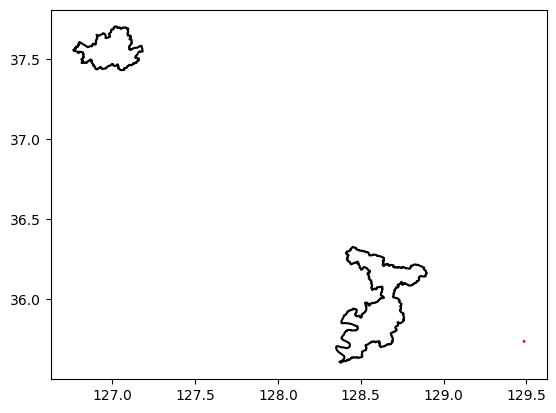

In [28]:
plt.plot(coord['서울특별시'][0], coord['서울특별시'][1], c = 'black')
plt.plot(coord['경상북도'][0], coord['경상북도'][1], c = 'red')
plt.plot(coord['대구광역시'][0], coord['대구광역시'][1], c = 'black')

In [23]:
# target_region = "R75"

# GeoJson 데이터 생성
restricted = get_restricted(end, vworld_key)
danger = get_danger(end, vworld_key)

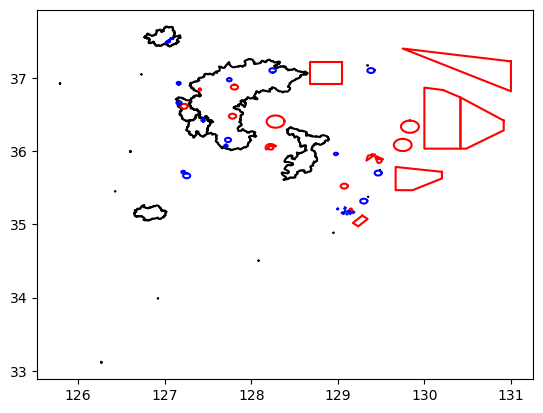

In [24]:

for region in coord.keys():
    plt.plot(coord[str(region)][0], coord[str(region)][1], c = 'black')
for region in restricted.keys():
    plt.plot(restricted[str(region)][0], restricted[str(region)][1], c = 'red')
for region in danger.keys():
    plt.plot(danger[str(region)][0], danger[str(region)][1], c = 'blue')

plt.show()

In [13]:
# 제한구역 데이터 가져오기
def get_sido(endpoint, key):

    ## 요청 파라미터
    service = "data" # 요청 서비스명 data(기본값)
    version = "2.0" # 요청 서비스 버전 2.0(기본값)
    request = "GetFeature" # 요청 서비스 오퍼레이션 | GetFeature, GetFeatureType
    format= "json" # 응답결과 포맷 | json(기본값), xml
    size = "60" # 한 페이지에 출력될 응답결과 건수 | default(10), min(1), max(1000)
    page = "1" # 응답결과 페이지 번호 | 기본값 : 1
    data = "LT_C_AISRESC" # 조회할 데이터 | LT_C_AISRESC
    columns = "restricted,res_lbl_1,res_lbl_2,res_lbl_3,ag_geom"
    geomfilter="BOX(127.0, 35.0, 131.0, 38.5)" # 지오메트리 필터 | 경북포항 경계
    '''지오메트리 필터 포맷
    - POINT(x y)
    - LINESTRING(x1 y1,x2 y2 [,xn yn])
    - POLYGON((x1 y1,x2 y2[,xn yn]))
    - MULTIPOLYGON(((x1 y1,x2 y2[,xn yn]))[,((x1 y1,x2 y2 [,xn yn]))])
    - BOX(minx,miny,maxx,maxy)
    '''
    geometry = "true" # 지오메트리 반환 여부 | true(기본값), false
    attribute = "true" # 속성 반환 여부 | true(기본값), false
    buffer = "10" # geomFilter파라미터에 입력한 feature를 buffer(거리, 단위:m)만큼 확장 | 숫자, 기본값:0
    
    # CRS = "EPSG:4326" # 응답결과 좌표계, EPSG:4326(기본값)
    # attrFilter = f"res_lbl_1:=:{region}" 

    # 요청 URL
    url = f"{endpoint}?service={service}&version={version}&request={request}&format={format}&size={size}&page={page}&data={data}&columns={columns}&geomfilter={geomfilter}&geometry={geometry}&attribute={attribute}&buffer={buffer}&key={key}&domain="
    
    # 요청 결과
    res = json.loads(requests.get(url).text)
    
    # GeoJson 생성
    regions = res["response"]["result"]["featureCollection"]['features']
    
    # 제한 구역 좌표값 딕셔너리 만들기
    '''restricted_dict = dict()
    for i in range(len(regions)):
        coordinates = regions[i]['geometry']['coordinates'][0][0]
        
        region_label = regions[i]['properties']['res_lbl_1']
        restricted_dict[str(region_label)] = coordinates'''

    return regions

In [17]:
sido = get_restricted(end, vworld_key)
sido

[{'type': 'Feature',
  'geometry': {'type': 'MultiPolygon',
   'coordinates': [[[[129.04999999999995, 37.216666499999974],
      [129.04999999999995, 36.91666649999996],
      [128.6833334999999, 36.91666649999996],
      [128.6833334999999, 37.216666499999974],
      [129.04999999999995, 37.216666499999974]]]]},
  'properties': {'restricted': "<FNT name='TW Cen MT' size='6'><CLR cyan='70' magenta='10' yellow='100' black='0'>R110\r\r\n<UND>FL 400</UND>\r\r\nGND</CLR></FNT>",
   'res_lbl_1': 'R110',
   'res_lbl_2': 'FL 400',
   'res_lbl_3': 'GND'},
  'id': 'LT_C_AISRESC.12'},
 {'type': 'Feature',
  'geometry': {'type': 'MultiPolygon',
   'coordinates': [[[[127.4731109999999, 37.36724999999995],
      [127.42866649999996, 37.32197199999996],
      [127.41255549999994, 37.33474999999993],
      [127.44477799999994, 37.370860999999934],
      [127.4731109999999, 37.36724999999995]]]]},
  'properties': {'restricted': "<FNT name='TW Cen MT' size='6'><CLR cyan='70' magenta='10' yellow='100' b

In [61]:
import folium

center = [36.0194, 129.3434]
m = folium.Map(location = center, zoom_start = 10)

restricted = get_restricted(end, vworld_key)
lat_lon = dict()

for region in restricted.keys():
    coordinates = []
    for i in restricted[str(region)]:
        rev = i[::-1]
        coordinates.append(rev)
        lat_lon[region] = coordinates
        #lat_lon = i.reverse()
        #coordinates.append(lat_lon)

In [52]:
import matplotlib.cm as cm

def plt_visualize(*lon_lat_dicts):
    color = ['red', 'blue', 'black']
    i = -1

    for dict in lon_lat_dicts:
      i += 1
      for region in dict.keys():
        plt.plot(dict[str(region)][0], dict[str(region)][1], c = color[i])
        
    plt.legend()
    plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


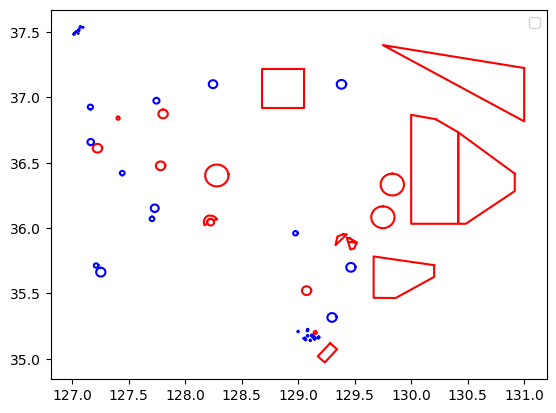

In [53]:
plt_visualize(restricted, danger)